# How are In-Demand Skills trending for Data Analysts?

### Methodology

1.  Aggregate skill counts monthly

2.  Re-analyze based on percentage of total jobs

3.  Plot monthly skill demand

In [1]:
#Importing Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns


#Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list:  ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)


In [2]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')]

In [4]:
df_da_us['job_posted_month_no']=df_da_us['job_posted_date'].dt.month

C:\Users\dylan\AppData\Local\Temp\ipykernel_12988\3772331736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_da_us['job_posted_month_no']=df_da_us['job_posted_date'].dt.month


In [5]:
df_da_us_explode = df_da_us.explode('job_skills')

In [ ]:
df_da_us_pivot=df_da_us_explode.pivot_table(
    index='job_posted_month_no',
    columns='job_skills',
    aggfunc='size',
    fill_value=0
)



job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [40]:
df_da_us_pivot.loc['Total']=df_da_us_pivot.sum()


In [41]:
df_da_us_pivot=df_da_us_pivot[df_da_us_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_us_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,capacitor,chainer,asp.net core,qt,microsoft lists,msaccess,kotlin,openstack,theano,xamarin
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,1,0,0,0,0,0,0,0,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,0,0,0,0,0,0,0,0,0,1
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,0,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,1,0,0,0,0
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,0,0,1,0,0,1,1,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df_da_us_pivot=df_da_us_pivot.drop('Total')

In [45]:
da_totals = df_da_us.groupby('job_posted_month_no').size()

In [46]:
df_da_us_pct = df_da_us_pivot.div(da_totals/100, axis=0)

In [62]:
df_da_us_pct =df_da_us_pct.reset_index()
df_da_us_pct['job_posted_month']=df_da_us_pct['job_posted_month_no'].apply(lambda x:  pd.to_datetime(x, format='%m').strftime('%b'))
df_da_us_pct = df_da_us_pct.set_index('job_posted_month')
df_da_us_pct=df_da_us_pct.drop(columns=['index', 'job_posted_month_no'])


In [76]:
df_plot=df_da_us_pct.iloc[:,:5]
df_plot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


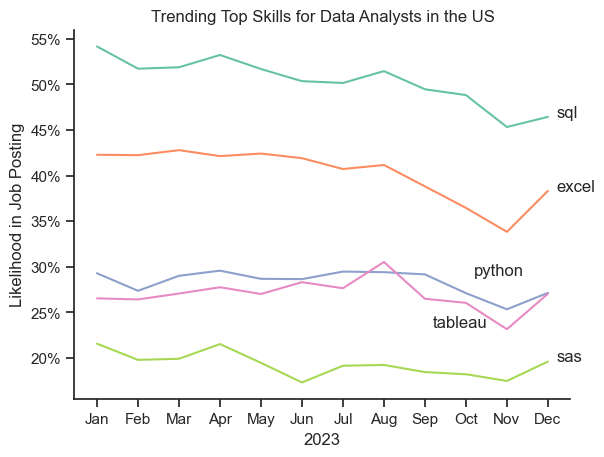

In [92]:
sns.lineplot(data=df_plot, dashes=False, palette='Set2')
sns.set_theme(style='ticks')

plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter

ax=plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    
    if i==3:
         plt.text(9.2, df_plot.iloc[-1, i]+2, df_plot.columns[i])   
    elif i==2:
         plt.text(8.2, df_plot.iloc[-1, i]-3.8, df_plot.columns[i])
    else:    
        plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])


sns.despine()

